# Hypothesis testing - 3

### LabTAT.csv Dataset

## A hospital wants to determine whether there is any difference in the average Turn Around Time (TAT) of reports of the laboratories on their preferred list. They collected a random sample and recorded TAT for reports of 4 laboratories. TAT is defined as sample collected to report dispatch.
## Analyze the data and determine whether there is any difference in average TAT among the different laboratories at 5% significance level. 

### Business objective / problem 

    Objective: To compare and find if there is any significant deviation in the Average TAT among the laboratories with 5% significance. 

    Problem: Hospital managers may check on the performance of lboratories based on the time taken to deliver a TEST reports. For hospitals sooner a lab can give the diagnosis/test report, with desired level of accuracy and precision, the better it is. In this case we are only testing TAT. We assume that all other things are normal and meet the desired level.

    Parameters on for Data Science point of view

    Let Lab_1 =  Sample data of TAT of Lab 1
    Let Lab_2 =  Sample data of TAT of Lab 2
    Let Lab_3 =  Sample data of TAT of Lab 3
    Let Lab_4 =  Sample data of TAT of Lab 4
    Check if Average TAT for Lab_1 = Lab_2 = Lab_5 = Lab_4 
    Alpha (a) = 0.05 or 5%
    
    In this case we are comparing more than two samples hence we use annova test

### Data Collection
    We need to collect or randomly sample the data set from the population. In rare cases we need to survey to collect the primary data mostly we use the secondary data for analysis. However in this case we are provided with randomly sampled data set. We can proceed with our study.
    
    WE ASSUME THAT DATA SETS OF EACH LAB INDEPENDENT.
    
    Let us use the given data : “LabTAT.csv”

In [1]:
# First thing first Import all the libraries
%matplotlib inline
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
DF = pd.read_csv('LabTAT.csv',header=0,names = ["Lab_1","Lab_2","Lab_3","Lab_4"])

### Data preparation / cleaning
#### Check the attributes of the data, check the integrity of data import into the system

In [3]:
DF.head(2)

,Lab_1,Lab_2,Lab_3,Lab_4
0,185.35,165.53,176.70,166.13
1,170.49,185.91,198.45,160.79


In [4]:
DF.shape

(120, 4)

#### Check for data types and decide proper data type for analysis

In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Lab_1   120 non-null    float64
 1   Lab_2   120 non-null    float64
 2   Lab_3   120 non-null    float64
 3   Lab_4   120 non-null    float64
dtypes: float64(4)
memory usage: 3.9 KB


#### Check for null values ------------------ no null values

In [6]:
DF.isnull().sum()

Lab_1    0
Lab_2    0
Lab_3    0
Lab_4    0
dtype: int64

#### Check for duplicates ------------ no duplicates

In [7]:
print(DF[DF.duplicated()].sum())
DF[DF.duplicated()]

Lab_1    0.0
Lab_2    0.0
Lab_3    0.0
Lab_4    0.0
dtype: float64


,Lab_1,Lab_2,Lab_3,Lab_4


#### Compare Basic Statistics for Lab_1	Lab_2	Lab_3	Lab_4 (first momentd of business decision)

In [8]:
DF.describe()

,Lab_1,Lab_2,Lab_3,Lab_4
count,120.000000,120.000000,120.000000,120.00000
mean,178.361583,178.902917,199.913250,163.68275
std,13.173594,14.957114,16.539033,15.08508
min,138.300000,140.550000,159.690000,124.06000
25%,170.335000,168.025000,188.232500,154.05000
50%,178.530000,178.870000,199.805000,164.42500
75%,186.535000,189.112500,211.332500,172.88250
max,216.390000,217.860000,238.700000,205.18000


As the sample size (120) is same for all 4 Labs and there are no null values we can draw reasonalble inference on the sample statitic. Mean and median are very close to each other in all the samples showing nearly normal distribution. However, Lab 1 and Lab 2 have larger variation in their mean and median, signalling left skewness. 

Comparing the means clearly shows that Lab_3 has the highest, showing it has higher Average TAT and Lab 4 showing lowest mean Showing Lowest Average TAT. 

However it is premature to conclude that the average TAT of 4 labs significantly very. Because the with each sample sample statistics very. Hence what may to true about the sample may not be true for the population from which the samples are drawn

#### Check for type distribution
    our base assumption is that the population of cutlets of both unit A and unit B are normally or nearly normally distributed

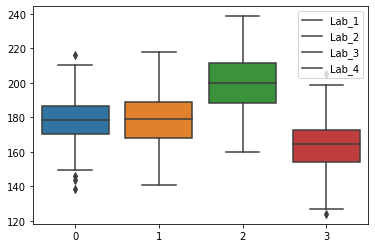

In [9]:
import matplotlib as plt
import seaborn as sns
sns.boxplot(data= [DF.Lab_1,DF.Lab_2,DF.Lab_3,DF.Lab_4])
plt.pyplot.legend(["Lab_1","Lab_2","Lab_3","Lab_4"])

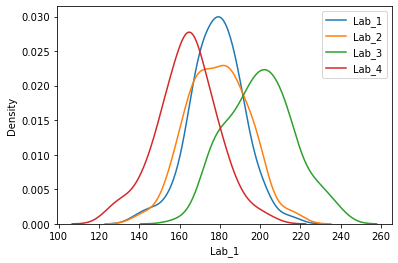

In [10]:
sns.kdeplot(DF.Lab_1)
sns.kdeplot(DF.Lab_2)
sns.kdeplot(DF.Lab_3)
sns.kdeplot(DF.Lab_4)
plt.pyplot.legend(['Lab_1' , 'Lab_2', 'Lab_3', 'Lab_4'])

##### The BOX Plot suggests that there are outliers in some of the data sets. The KDE Plot suggests that there are hevier tails in mejority of data sets. Though by appearance both plots suggest towards nearly normal distribution, we can't conclude their being normal distribution. Moreover, we can't draw inference on population using sample distribution as distribution may very with samples. Hence we do statistical test - shapiro wilk test on each individual dataset.

#### -----Test for normal population Distribution - Shapiro-----
    H0 = Both samples are drawn from normally distributed populations
    H1 = Atleast one of the samples are not drawn from normally distributed popluation

In [11]:
stat1 , p1 = stats.shapiro(DF.Lab_1)
stat2 , p2 = stats.shapiro(DF.Lab_2)
stat3 , p3 = stats.shapiro(DF.Lab_3)
stat4 , p4 = stats.shapiro(DF.Lab_4)
print("pvlaue for Lab_1-> {:.2f}%, pvalue for Lab_1-> {:.2f}%, pvalue for Lab_1-> {:.2f}%, pvalue for Lab_1-> {:.2f}%".format((p1*100),(p2*100),(p3*100),(p4*100)))

pvlaue for Lab_1-> 55.07%, pvalue for Lab_1-> 86.38%, pvalue for Lab_1-> 42.05%, pvalue for Lab_1-> 66.19%



###### As "pvalues" of All samples are greater than Alpha (5%) in Shapiro Test, We can conclude that we don't have enought evidence to reject null hyphothesis. Hence be shall hold/assumed that ALL samples are drawn from normally distributed populations

#### ------Check for Varience of the populations--------
our base assumption is that the population of cutlets of both unit A and unit B Have same varience

In order to check varience of the population using the samples drwan we use levene test.

H0 = varience of both groups are equal 
H1 = varience of both groups are unequal

In [12]:
lStat, lP = stats.levene(DF.Lab_1,DF.Lab_2,DF.Lab_3,DF.Lab_4)
print('\npvalue for levene test is {:.2f}%'.format(lP*100))
stats.levene(DF.Lab_1,DF.Lab_2,DF.Lab_3,DF.Lab_4)


pvalue for levene test is 5.16%


LeveneResult(statistic=2.599642500418024, pvalue=0.05161343808309816)

as it can be noted that the pavlue is greater than alpha 0.05(5%), but marginally higher than the alpha. We can attribute the varience to the randome sampling and conclude there is not enought evidence to reject null hypothesis. HENCE THE POPULATION VARIENCE IS EQUAL.

Ideally in case of levene test small pvalue indicates that the variences are not equal. But the interpretaion is that, if the pvalue is less than alpha usually 5% then it is highly unlikely that such varience has occured due to random sampling. Hence we can conclude that the population varience is not equal.

### Data analysis in the context of business case

#### Constructing Hypothesis  
    H0 = Average TAT for all labs is equal             ----->>>>    Mu-Lab1 = Mu-lab2 = Mu-Lab3 = Mu-Lab4
    H1 = Average TAT for atleast one lab is not equal  ----->>>>    Mu-Lab1 != Mu-lab2 != Mu-Lab3 != Mu-Lab4

#### CASE for ANOVA
    
    As we are comparing more than two samples precisely 4 in this case we to check mean TAT for 4 labs are equal we will undertake ***ANOVA TEST*** 
    
    For ANOVA test following conditions must be satisfied
    
    1. The samples are independent. - ***SAMPLES ARE RANDOM AS STATED BY PROBLEM STATEMENT AND INDEPENDENCE WE ASSUME***
    2. Each sample is from a normally distributed population. - ***BASED ON SHAPIRO TEST WE CONCLUDED THE POPULATION NORMALCY**
    3. The population standard deviations of the groups are all equal. - ***LEVENE TEST CONFIRMS HOMOSCEDASTICITY***
        This property is known as homoscedasticity.

#### Calculate p values using one-way ANOVA

In [13]:
fStatistic, Pvalue = stats.f_oneway(DF.Lab_1,DF.Lab_2,DF.Lab_3,DF.Lab_4)
print('\n', stats.f_oneway(DF.Lab_1,DF.Lab_2,DF.Lab_3,DF.Lab_4))
print('\n pvalue : {:.6f}% , fstatistic : {}'.format((Pvalue*100),fStatistic))
# Pvalue


 F_onewayResult(statistic=118.70421654401437, pvalue=2.1156708949992414e-57)

 pvalue : 0.000000% , fstatistic : 118.70421654401437


help(stats.f_oneway)
 f_oneway(*args, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Notes
    -----
    The ANOVA test has important assumptions that must be satisfied in order
    for the associated p-value to be valid.
    
    1. The samples are independent.
    2. Each sample is from a normally distributed population.
    3. The population standard deviations of the groups are all equal.  This
       property is known as homoscedasticity.
        
        check in case of unequal verience -> Kruskal-Wallis H-test (`scipy.stats.kruskal`)

#### Check if p value id less than alpha

In [14]:
if Pvalue <=0.05:
    print('\nThere is sufficient evidence to reject null Hypothesis, Hence, consider "Alternate Hypothesis" and take action\n')
else:
    print('\nThe is not enough evidence to reject null Hypothesis. Hence, we shall continue to trust Null hypothesis\n')


There is sufficient evidence to reject null Hypothesis, Hence, consider "Alternate Hypothesis" and take action



AS PVALUE IS LESS VERY LOW (ALMOST ZERO FOR ALL PRACTICAL SENSE) WE SHALL REJECT NULL HYPOTHESIS AND CONSIDER ALTERNATE HYPOTHESIS OF ATLEAST ONE POPULATION MEAN IS LESS OR MORE THAN THE REST OF POPULATION.

WE ADVISE THE MANAGEMENT TO TAKE FURTHER ANALYSIS TO IDENTIFY BETTER PERFORMING LABS USING OTHER STATISTICAL TOOLS AND TAKE APPROPRIATE ACTION. AS DEEMED FIT.